In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# plt.style.use('ggplot')
plt.style.use('seaborn')
import locale
locale.setlocale(locale.LC_NUMERIC, '')
import os
import numpy as np
import scipy.stats as stats
# plt.style.available

In [2]:
array_with_baselines = []
for subdir, dirs, files in os.walk(r'C:\Users\safre\Desktop\diplom\pvloop\data\Baselines'):
#     print(subdir, dirs, files)
    for file in files:
        filepath = os.path.join(subdir, file)
#         print(file, subdir)
        if file == ('rat_14_baseline_1.txt'):
            continue
        a = pd.read_csv(filepath, sep='\t', engine = 'python', decimal = ',', index_col=0)
        a.replace(' ', np.nan, inplace=True)
        a.dropna(inplace=True)
        a = a[:-5]
#         try:
        a = a.applymap(locale.atof)
#         except:
#             print(file, subdir)
#             continue
#             print('\n')
        a.reset_index(drop=True, inplace=True)
        a['group_type'] = subdir.split('\\')[-1]
        a['rat_no'] = file[:-4] 
#         print(file[:-4])
#         try:
        a['EF%'] = (a['Ved (µL)'] - a['Ves (µL)'])*100/a['Ved (µL)']
#         except:
#             print(file, subdir)
#             a['EF%'] = float('nan')
#             print('\n')
#             continue
        a['IVG'] = a['dP/dt max (mmHg/s)']/a['P@dP/dt max (mmHg)']
#         try:
        a = a.drop(['Vmax (µL)', 'Vmin (µL)', 'Pmax (mmHg)', 'Pmin (mmHg)', 'Pmean (mmHg)', 'Pdev (mmHg)',
                                 'dP/dt min (mmHg/s)', 'dV/dt max (µL/s)', 'dV/dt min (µL/s)', 'P@dV/dt max (mmHg)', 
                                'P@dP/dt max (mmHg)', 'V@dP/dt max (µL)', 'V@dP/dt min (µL)', 'Tau (ms)'], axis=1)
#         except:
#             print(file, subdir)
#             continue
        array_with_baselines.append(a)
#         print(subdir.split('\\')[-1])
#         break

array_with_baselines[0]
all_baselines = pd.concat(array_with_baselines)
all_baselines.head()
# all_baselines[all_baselines['rat_no'] == 'rat_10k_baseline_2']

,CE,CO (µL/min),EF (%),EF%,Ea (mmHg/µL),HR (bpm),IVG,PE (mmHg*µL),PVA (mmHg*µL),Ped (mmHg),Pes (mmHg),PowMax (mmHg*µL/s),SV (µL),SW (mmHg*µL),Ved (µL),Ves (µL),dP/dt max (mmHg/s),group_type,rat_no
0,NaN,199000000.0,91.76,75.711861,0.2687,375.0,138538.784712,NaN,NaN,-0.1847,142.6,1.704000e+09,530.7,62270000.0,530.3,128.8,13520000.0,control,rat_10k_baseline_1
1,NaN,177500000.0,99.20,74.304207,0.3087,379.7,124954.954955,NaN,NaN,3.6050,144.3,9.543000e+08,467.4,52120000.0,463.5,119.1,13870000.0,control,rat_10k_baseline_1
2,NaN,199200000.0,96.60,76.237113,0.2762,377.4,126562.500000,NaN,NaN,1.3680,145.8,1.725000e+09,527.8,60340000.0,582.0,138.3,13770000.0,control,rat_10k_baseline_1
3,NaN,165900000.0,99.72,73.802612,0.3191,377.4,133237.547893,NaN,NaN,3.3650,140.3,7.012000e+08,439.7,48540000.0,413.4,108.3,13910000.0,control,rat_10k_baseline_1
4,NaN,206700000.0,96.93,75.781861,0.2560,375.0,133827.893175,NaN,NaN,-0.3146,141.1,2.218000e+09,551.2,59750000.0,511.6,123.9,13530000.0,control,rat_10k_baseline_1


In [67]:
###### array_with_occlusions = []
for subdir, dirs, files in os.walk(r'C:\Users\safre\Desktop\diplom\pvloop\data\Occlusions'):
#     print(subdir, dirs, files)
    for file in files:
        filepath = os.path.join(subdir, file)
#         print(file, subdir)
        if file == ('rat_14_baseline_1.txt'):
            continue
        a = pd.read_csv(filepath, sep='\t', engine = 'python', decimal = ',', index_col=0)
        a.replace(' ', np.nan, inplace=True)
        a.dropna(inplace=True)
        a = a[:-5]
#         try:
        a = a.applymap(locale.atof)
#         except:
#             print(file, subdir)
#             continue
#             print('\n')
        a.reset_index(drop=True, inplace=True)
        a['group_type'] = subdir.split('\\')[-1]
        a['rat_no'] = file[:-4] 
#         print(file[:-4])
#         try:
        a['EF%'] = (a['Ved (µL)'] - a['Ves (µL)'])*100/a['Ved (µL)']
#         except:
#             print(file, subdir)
#             a['EF%'] = float('nan')
#             print('\n')
#             continue
        a['IVG'] = a['dP/dt max (mmHg/s)']/a['P@dP/dt max (mmHg)']
#         try:
        a = a.drop(['Vmax (µL)', 'Vmin (µL)', 'Pmax (mmHg)', 'Pmin (mmHg)', 'Pmean (mmHg)', 'Pdev (mmHg)',
                                 'dP/dt min (mmHg/s)', 'dV/dt max (µL/s)', 'dV/dt min (µL/s)', 'P@dV/dt max (mmHg)', 
                                'P@dP/dt max (mmHg)', 'V@dP/dt max (µL)', 'V@dP/dt min (µL)', 'Tau (ms)'], axis=1)
#         except:
#             print(file, subdir)
#             continue
        array_with_occlusions.append(a)
#         print(subdir.split('\\')[-1])
#         break
# array_with_occlusions[1].head()
# all_occlusions = pd.concat(array_with_occlusions)
# all_occlusions.head()
all_occlusions[all_occlusions['rat_no'] == 'rat_10k_occlusion_2']

,SW (mmHg*µL),CO (µL/min),SV (µL),Ves (µL),Ved (µL),Pes (mmHg),Ped (mmHg),HR (bpm),EF (%),Ea (mmHg/µL),PowMax (mmHg*µL/s),dP/dt max (mmHg/s),PVA (mmHg*µL),PE (mmHg*µL),CE,group_type,rat_no,EF%,IVG
0,34910000.0,117300000.0,307.0,91.25,329.3,148.50,2.0380,382.2,88.16,0.4835,892300000.0,14190000.0,46990000.0,12080000.0,0.7430,control,rat_10k_occlusion_2,72.289705,137766.990291
1,31940000.0,106100000.0,281.1,83.73,311.4,144.10,1.4360,377.4,87.19,0.5127,798500000.0,14110000.0,42510000.0,10560000.0,0.7515,control,rat_10k_occlusion_2,73.111753,134765.998090
2,29730000.0,98140000.0,258.4,72.55,284.8,138.40,1.4160,379.7,86.40,0.5354,619500000.0,13910000.0,38270000.0,8533.0,0.7770,control,rat_10k_occlusion_2,74.525983,131226.415094
3,27250000.0,90670000.0,237.3,64.80,263.7,133.10,1.2180,382.2,86.62,0.5609,559700000.0,13540000.0,34010000.0,6760.0,0.8012,control,rat_10k_occlusion_2,75.426621,127856.468366
4,25020000.0,82770000.0,217.9,59.25,245.4,126.70,0.5404,379.7,84.89,0.5812,460600000.0,13090000.0,30590000.0,5563.0,0.8181,control,rat_10k_occlusion_2,75.855746,122222.222222
5,22880000.0,77270000.0,203.5,54.41,223.8,121.30,0.3762,379.7,84.18,0.5963,385900000.0,12540000.0,27600000.0,4720.0,0.8290,control,rat_10k_occlusion_2,75.688114,116111.111111
6,21320000.0,71950000.0,188.3,51.84,215.3,116.00,0.3146,382.2,83.18,0.6159,292000000.0,12300000.0,25610000.0,4295.0,0.8323,control,rat_10k_occlusion_2,75.921969,127316.012835
7,20560000.0,68640000.0,183.0,47.59,216.0,111.90,-0.2599,375.0,83.57,0.6112,235000000.0,11970000.0,24380000.0,3821.0,0.8433,control,rat_10k_occlusion_2,77.967593,123122.814236
8,20470000.0,70240000.0,185.0,44.51,215.6,108.80,0.4925,379.7,84.53,0.5881,216900000.0,11610000.0,23920000.0,3448.0,0.8559,control,rat_10k_occlusion_2,79.355288,119125.795198
9,20010000.0,69500000.0,183.0,41.87,217.3,105.00,0.4036,379.7,84.87,0.5736,152700000.0,11310000.0,23330000.0,3320.0,0.8577,control,rat_10k_occlusion_2,80.731707,118169.470275


In [106]:
a = all_occlusions[all_occlusions['rat_no'] == 'rat_42_occlusione_3'][['SW (mmHg*µL)', 'Ved (µL)']]
a
from sklearn import linear_model
Im = linear_model.LinearRegression()
X = a.drop('SW (mmHg*µL)', axis = 1)
Im.fit(X, a['SW (mmHg*µL)'])
print(Im.coef_)


[117615.82275483]


In [15]:
# двухуровневая таблица по параметрам групп и крысс (взяты средние параметры за воздействие)
means = pd.DataFrame(all_occlusions.groupby(['group_type', 'rat_no'])['PVA (mmHg*µL)'].mean())
# выделение 3-х групп
control = means.drop(['dox', 'dox+skq'])
control.reset_index(level=['rat_no'], inplace=True)
dox = means.drop(['control', 'dox+skq'])
dox.reset_index(level=['rat_no'], inplace=True)
skq = means.drop(['dox', 'control'])
skq.reset_index(level=['rat_no'], inplace=True)

# sw_means
# control
dox
# skq

,rat_no,PVA (mmHg*µL)
group_type,,
dox,rat_13_occlusion_saline,7.954105e+05
dox,rat_15_occlusion,2.381655e+07
dox,rat_15_occlusion_2,2.834478e+07
dox,rat_15_occlusion_saline,1.872830e+07
dox,rat_16_occlusion,1.738857e+07
dox,rat_16_occlusion_2,1.663738e+07
dox,rat_16_occlusion_saline,1.956717e+07
dox,rat_17_occlusion,1.072600e+07
dox,rat_17_occlusion_2,2.626529e+06


In [28]:
a = '10k'
xlabels = ['10k']
b = []
c = []
control = control[control.rat_no != 'rat_3M_baseline_1'] 
control = control[control.rat_no != 'rat_3M_baseline_2']

print(control, '\n')

for rat in control['rat_no']:
#     print(rat.split('_')[1])
    n = rat.split('_')[1]
    k = control[control['rat_no'] == rat]['SW (mmHg*µL)'].tolist()[0]
#     print('\n')
    if n == a:
#         print('if')
        b.append(k)
#         print(b)
#         print('\n')
    else:
#         print('else')
        xlabels.append(n)
        a = rat.split('_')[1]
        if len(b) < 2:
            b.append(0)
        c.append(b)
        b = []
        b.append(k)
#         print(c)
#         print('\n')
c.append(b)
# print(len(c))
print(xlabels)
print(c)
data_control = c

                            rat_no  SW (mmHg*µL)
group_type                                      
control         rat_10k_baseline_1  5.898688e+07
control         rat_10k_baseline_2  4.771379e+07
control          rat_1M_baseline_1  5.959450e+07
control          rat_2M_baseline_1  4.658154e+07
control     rat_2M_baseline_2_good  4.204733e+07
control          rat_4M_baseline_1  4.588900e+07
control          rat_4M_baseline_2  5.750273e+07
control          rat_5M_baseline_1  2.646074e+07
control          rat_5M_baseline_2  2.803538e+07
control          rat_6k_baseline_1  3.020207e+07
control          rat_6k_baseline_2  3.185333e+07
control          rat_7k_baseline_1  3.972440e+07
control          rat_7k_baseline_2  3.930648e+07 

['10k', '1M', '2M', '4M', '5M', '6k', '7k']
[[58986875.0, 47713793.10344828], [59594500.0, 0], [46581538.461538464, 42047333.333333336], [45889000.0, 57502727.27272727], [26460740.740740743, 28035384.615384616], [30202068.96551724, 31853333.333333332], [39724400.

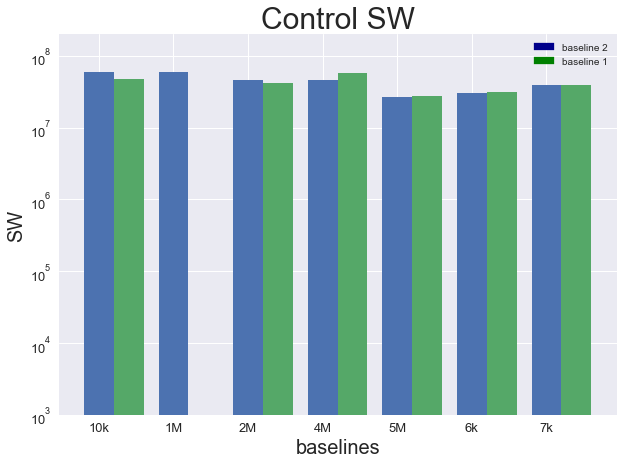

In [29]:
dim = len(data_control[0])
w = 0.8
dimw = w / dim
fig, ax = plt.subplots()
x = np.arange(len(data_control))
for i in range(len(data_control[0])):
    y = [d[i] for d in data_control]
    b = ax.bar(x + i * dimw, y, dimw, bottom=0.001)

# ax.set_xticks(x + dimw / 2, map(str, x))
# ax.set_xticks(x )

fig.set_size_inches(10, 7)

green_patch = mpatches.Patch(color='green', label='baseline 1')
blue_patch = mpatches.Patch(color='darkblue', label='baseline 2')
plt.legend(handles=[blue_patch, green_patch], loc = 1)

ax.set_yscale('log')

plt.title("Control SW", fontsize = 30)
plt.xlabel("baselines", fontsize = 20)
plt.ylabel("SW", fontsize = 20)
plt.ylim(1e+3, 2e+8)
plt.xticks(x, xlabels, fontsize = 13)
plt.yticks(fontsize = 13)

# plt.savefig(r'data\baseline\control.png')
plt.show()

In [22]:
# dox = dox[dox.rat_no != 'rat_17_baseline_2'] 
# dox = dox[dox.rat_no != 'rat_17_baseline_3'] 
# dox = dox[dox.rat_no != 'rat_34_baseline_saline'] 
# dox = dox[dox.rat_no != 'rat_34_baseline_saline_2'] 
a = '13'
xlabels = ['13']
b = []
c = []
print(dox, '\n')

for rat in dox['rat_no']:
#     print(rat.split('_')[1])
    n = rat.split('_')[1]
    k = dox[dox['rat_no'] == rat]['SW (mmHg*µL)'].tolist()[0]
#     print('\n')
    if n == a:
#         print('if')
        b.append(k)
#         print(b)
#         print('\n')
    else:
#         print('else')
        xlabels.append(n)
        a = rat.split('_')[1]
        while len(b) < 4:
            b.append(0)
        c.append(b)
        b = []
        b.append(k)
#         print(c)
#         print('\n')
while len(b) < 4:
    b.append(0)
c.append(b)
# print(len(c))
print(xlabels)
print(c)
data_dox = c

                       rat_no  SW (mmHg*µL)
group_type                                 
dox         rat_13_baseline_1  7.450917e+03
dox         rat_13_baseline_2  4.992452e+03
dox         rat_13_baseline_3  1.354800e+07
dox         rat_15_baseline_1  3.158250e+07
dox         rat_15_baseline_2  4.770444e+07
dox         rat_16_baseline_1  4.089667e+07
dox         rat_16_baseline_2  2.849400e+07
dox         rat_16_baseline_3  3.508929e+07
dox         rat_16_baseline_4  3.870889e+07
dox         rat_17_baseline_2  1.476000e+07
dox         rat_17_baseline_3  2.118833e+07
dox         rat_18_baseline_1  2.912750e+07
dox         rat_18_baseline_2  2.535500e+07
dox         rat_18_baseline_3  2.562714e+07
dox         rat_18_baseline_4  2.397200e+07
dox         rat_21_baseline_1  4.090903e+07
dox         rat_21_baseline_2  3.875104e+07
dox         rat_23_baseline_1  3.670079e+07
dox         rat_23_baseline_2  3.525109e+07
dox         rat_25_baseline_1  4.419333e+07
dox         rat_25_baseline_2  3

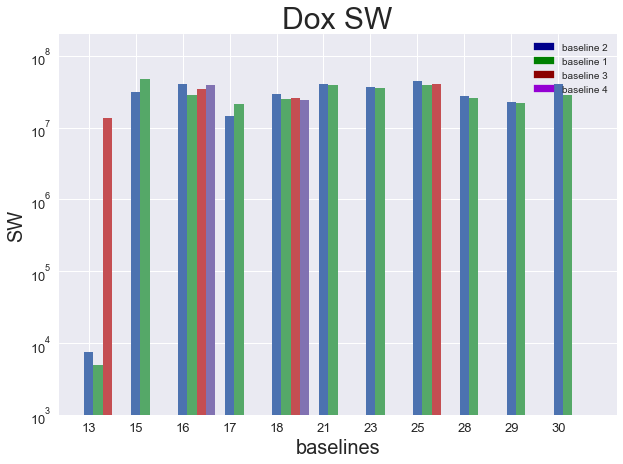

In [23]:
dim = len(data_dox[0])
w = 0.8
dimw = w / dim
fig, ax = plt.subplots()
x = np.arange(len(data_dox))
for i in range(len(data_dox[0])):
    y = [d[i] for d in data_dox]
    b = ax.bar(x + i * dimw, y, dimw, bottom=0.001)

# ax.set_xticks(x + dimw / 2, map(str, x))
# ax.set_xticks(x )

fig.set_size_inches(10, 7)

green_patch = mpatches.Patch(color='green', label='baseline 1')
blue_patch = mpatches.Patch(color='darkblue', label='baseline 2')
red_patch = mpatches.Patch(color='darkred', label='baseline 3')
violet_patch = mpatches.Patch(color='darkviolet', label='baseline 4')
plt.legend(handles=[blue_patch, green_patch, red_patch, violet_patch], loc = 1)

ax.set_yscale('log')

plt.title("Dox SW", fontsize = 30)
plt.xlabel("baselines", fontsize = 20)
plt.ylabel("SW", fontsize = 20)
plt.ylim(1e+3, 2e+8)
plt.xticks(x, xlabels, fontsize = 13)
plt.yticks(fontsize = 13)

# plt.savefig(r'data\baseline\control.png')
plt.show()

In [15]:
skq = skq[skq.rat_no != 'rat_31_baseline_saline'] 
skq = skq[skq.rat_no != 'rat_31_baseline_saline_1'] 
skq = skq[skq.rat_no != 'rat_34_baseline_saline'] 
skq = skq[skq.rat_no != 'rat_34_baseline_saline_2'] 
skq
a = '31'
xlabels = ['31']
b = []
c = []
# dox.reset_index(level=['rat_no'], inplace=True)
print(dox, '\n')

for rat in skq['rat_no']:
#     print(rat.split('_')[1])
    n = rat.split('_')[1]
    k = skq[skq['rat_no'] == rat]['SW (mmHg*µL)'].tolist()[0]
#     print('\n')
    if n == a:
#         print('if')
        b.append(k)
#         print(b)
#         print('\n')
    else:
#         print('else')
        xlabels.append(n)
        a = rat.split('_')[1]
        while len(b) < 3:
            b.append(0)
        c.append(b)
        b = []
        b.append(k)
#         print(c)
#         print('\n')
while len(b) < 3:
    b.append(0)
c.append(b)
# print(len(c))
print(xlabels)
print(c)
data_skq = c

                       rat_no  SW (mmHg*µL)
group_type                                 
dox         rat_13_baseline_1  7.450917e+03
dox         rat_13_baseline_2  4.992452e+03
dox         rat_13_baseline_3  1.354800e+07
dox         rat_15_baseline_1  3.158250e+07
dox         rat_15_baseline_2  4.770444e+07
dox         rat_16_baseline_1  4.089667e+07
dox         rat_16_baseline_2  2.849400e+07
dox         rat_16_baseline_3  3.508929e+07
dox         rat_16_baseline_4  3.870889e+07
dox         rat_17_baseline_2  1.476000e+07
dox         rat_17_baseline_3  2.118833e+07
dox         rat_18_baseline_1  2.912750e+07
dox         rat_18_baseline_2  2.535500e+07
dox         rat_18_baseline_3  2.562714e+07
dox         rat_18_baseline_4  2.397200e+07
dox         rat_21_baseline_1  4.090903e+07
dox         rat_21_baseline_2  3.875104e+07
dox         rat_23_baseline_1  3.670079e+07
dox         rat_23_baseline_2  3.525109e+07
dox         rat_25_baseline_1  4.419333e+07
dox         rat_25_baseline_2  3

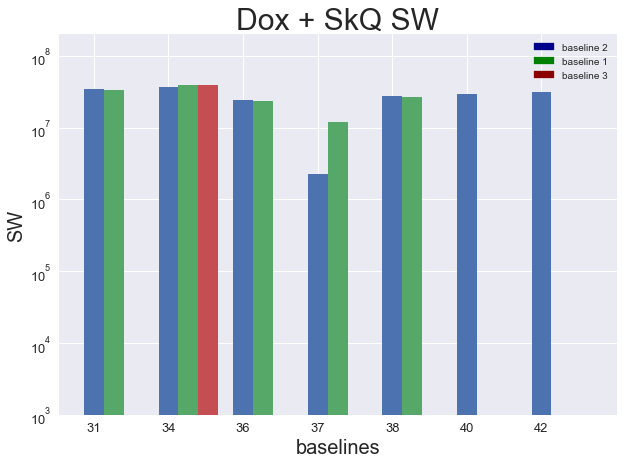

In [17]:
dim = len(data_skq[0])
w = 0.8
dimw = w / dim
fig, ax = plt.subplots()
x = np.arange(len(data_skq))
for i in range(len(data_skq[0])):
    y = [d[i] for d in data_skq]
    b = ax.bar(x + i * dimw, y, dimw, bottom=0.001)

# ax.set_xticks(x + dimw / 2, map(str, x))
# ax.set_xticks(x )

fig.set_size_inches(10, 7)

green_patch = mpatches.Patch(color='green', label='baseline 1')
blue_patch = mpatches.Patch(color='darkblue', label='baseline 2')
red_patch = mpatches.Patch(color='darkred', label='baseline 3')

plt.legend(handles=[blue_patch, green_patch, red_patch], loc = 1)

ax.set_yscale('log')

plt.title("Dox + SkQ SW", fontsize = 30)
plt.xlabel("baselines", fontsize = 20)
plt.ylabel("SW", fontsize = 20)
plt.ylim(1e+3, 2e+8)
plt.xticks(x, xlabels, fontsize = 13)
plt.yticks(fontsize = 13)

# plt.savefig(r'data\baseline\control.png')
plt.show()